In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.manifold import MDS

In [2]:
cars_od = pd.read_csv("cars.dissimilarity.csv", sep=",", index_col=0)
cars_ar = pd.read_csv("cars.ar.csv", sep=",", index_col=0)

In [3]:
names = np.array(cars_od.columns)

In [4]:
mds = MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress="auto", random_state=40)
mds_fit_out = mds.fit(cars_od)

In [5]:
mds_fit_out.stress_ 

11.89770062802191

[]

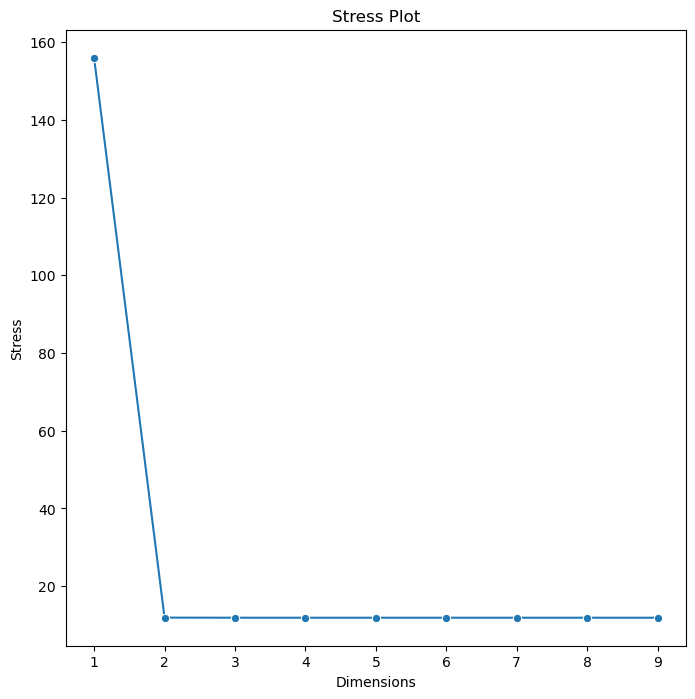

In [6]:
mss = []
for k in range(1,10):
    mds1 = MDS(n_components=k, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress="auto")
    mds_fit_out1 = mds1.fit(cars_od)
    stress1 = (mds_fit_out1.stress_)
    mss.append(stress1)

plt.figure(figsize=(8,8))
sns.lineplot(x = range(1,10), y = mss, marker = "o")
plt.title('Stress Plot')
plt.ylabel('Stress')
plt.xlabel('Dimensions')
plt.plot()

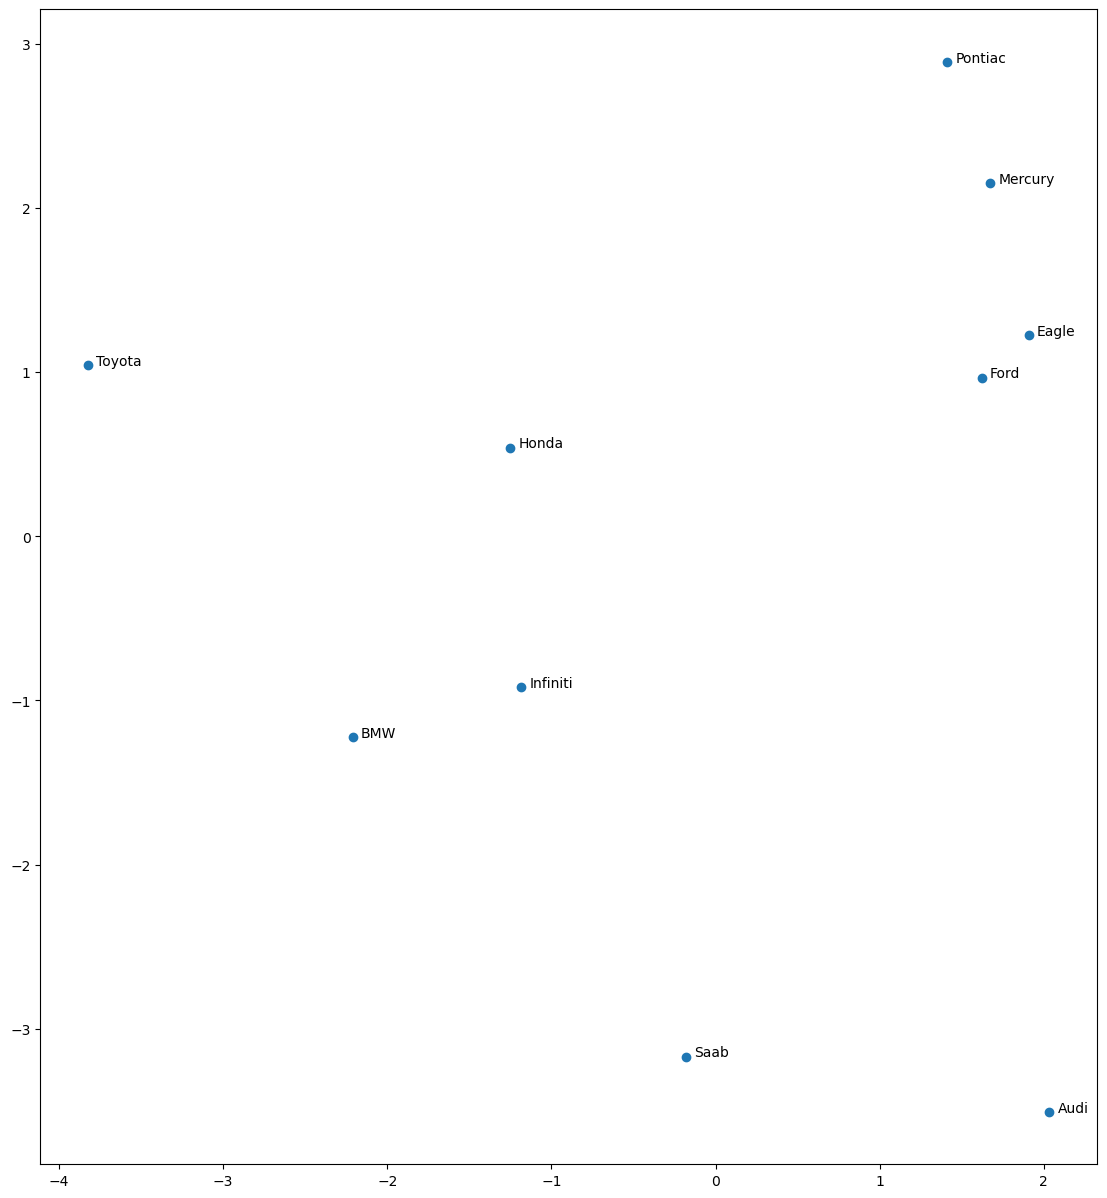

In [10]:
mds2 = MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress="auto", random_state=40)
mds_fit_out2 = mds2.fit(cars_od)
points_cars2 = mds_fit_out2.embedding_
x = points_cars2[:,0]
y = points_cars2[:,1]

plt.figure(figsize=(15,15))
plt.scatter(x, y)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
for i in range(len(x)):
    plt.annotate(names[i], (x[i]+0.05, y[i]))
plt.show()

***

[]

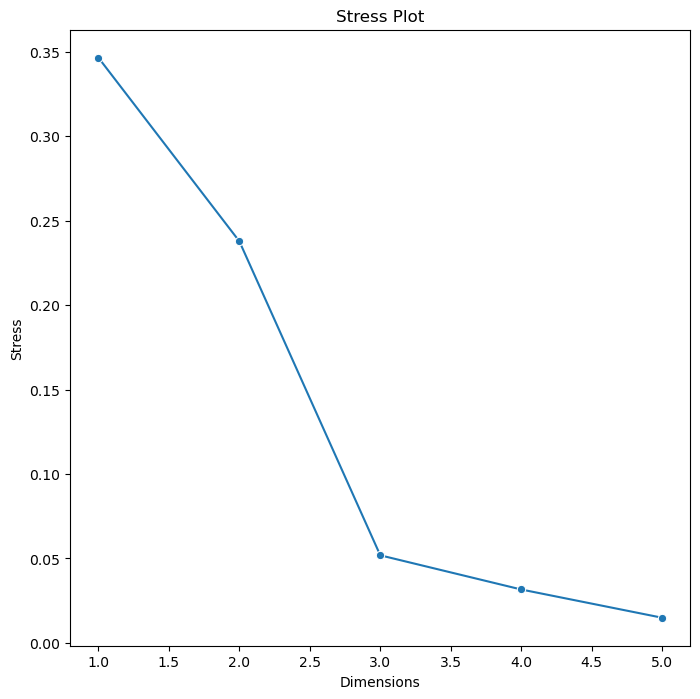

In [7]:
mss1 = []
for k in range(1,6):
    mds2 = MDS(n_components=k, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress="auto")
    mds_fit_out2 = mds2.fit(cars_od)
    stress2 = (mds_fit_out2.stress_)
    mss1.append(stress2)

plt.figure(figsize=(8,8))
sns.lineplot(x = range(1,6), y = mss1, marker = "o")
plt.title('Stress Plot')
plt.ylabel('Stress')
plt.xlabel('Dimensions')
plt.plot()

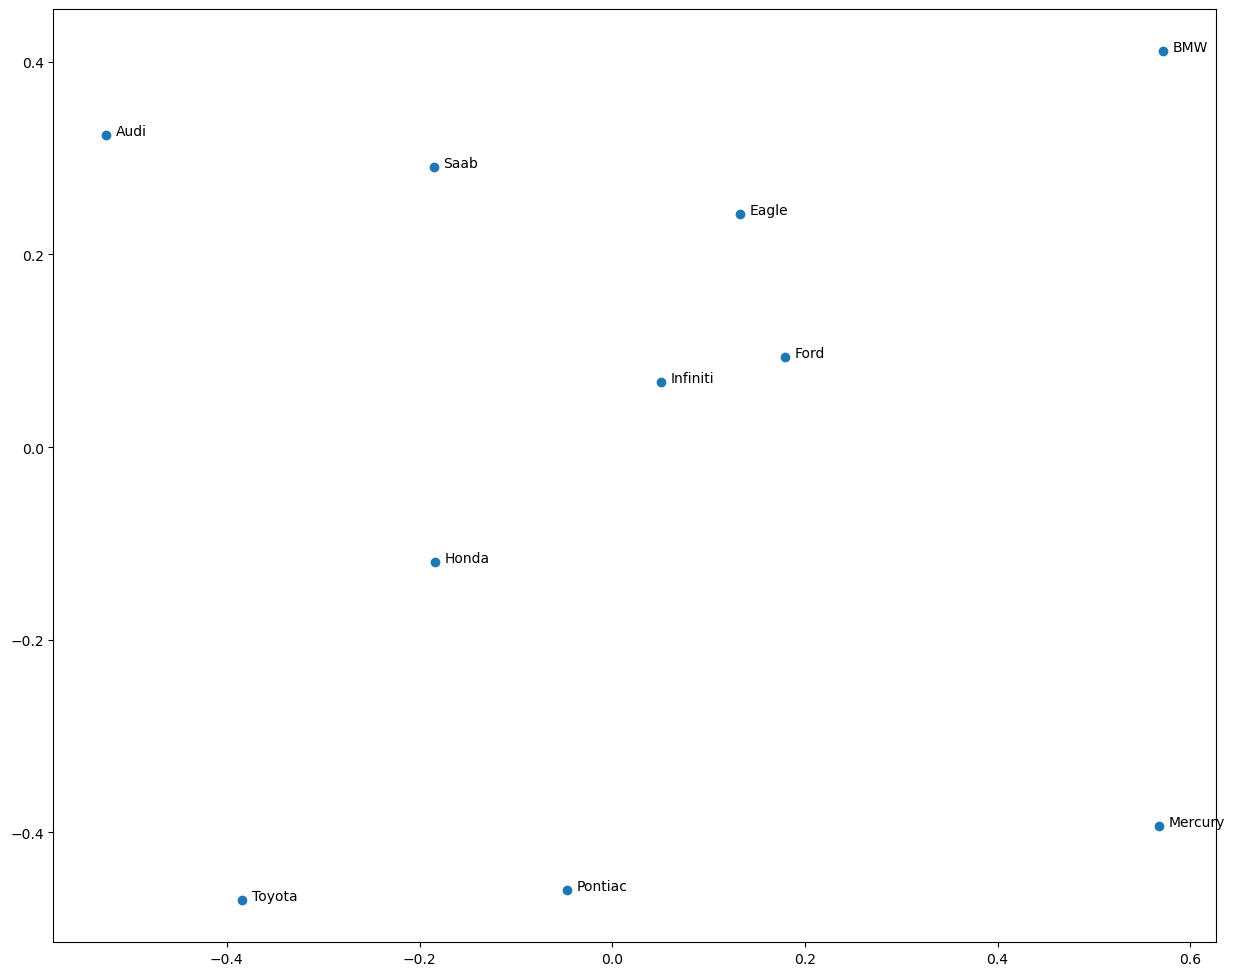

In [13]:
mds3 = MDS(n_components=2, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress="auto", random_state=10)
mds_fit_out3 = mds3.fit(cars_od)
points_cars3 = mds_fit_out3.embedding_
x1 = points_cars3[:,0]
y1 = points_cars3[:,1]

plt.figure(figsize=(15,15))
plt.scatter(x1, y1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
for i in range(len(x1)):
    plt.annotate(names[i], (x1[i]+0.01, y1[i]))
plt.show()

***

In [10]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_communalities = fa_fit_out.get_communalities()
fa_gof = sum(fa_communalities)
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_
fa_gof

13.785100009818924

[]

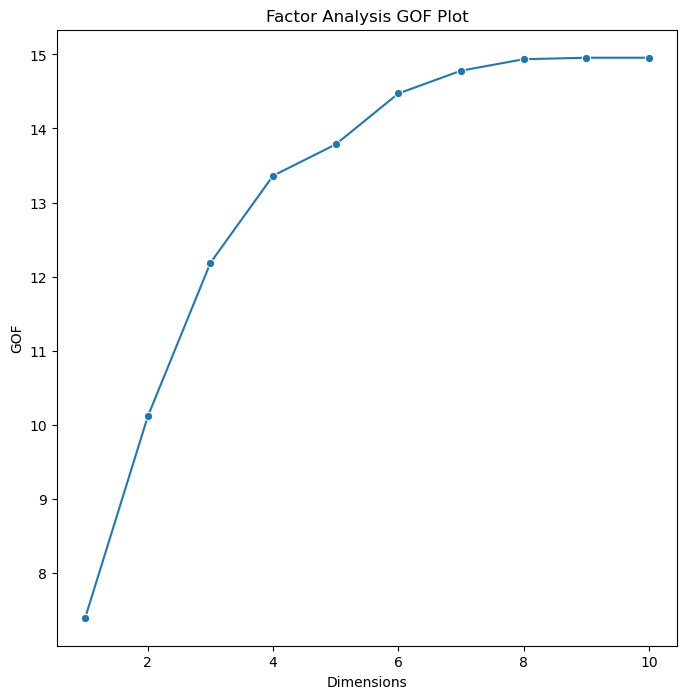

In [11]:
FA = []
for k in range(1,11):
    fa1 = FactorAnalyzer(n_factors=k, rotation=None)
    fa_fit_out1 = fa1.fit(cars_ar)
    fa_communalities1 = fa_fit_out1.get_communalities()
    fa_gof1 = sum(fa_communalities1)
    FA.append(fa_gof1)

plt.figure(figsize=(8,8))
sns.lineplot(x = range(1,11), y = FA, marker = "o")
plt.title('Factor Analysis GOF Plot')
plt.ylabel('GOF')
plt.xlabel('Dimensions')
plt.plot()

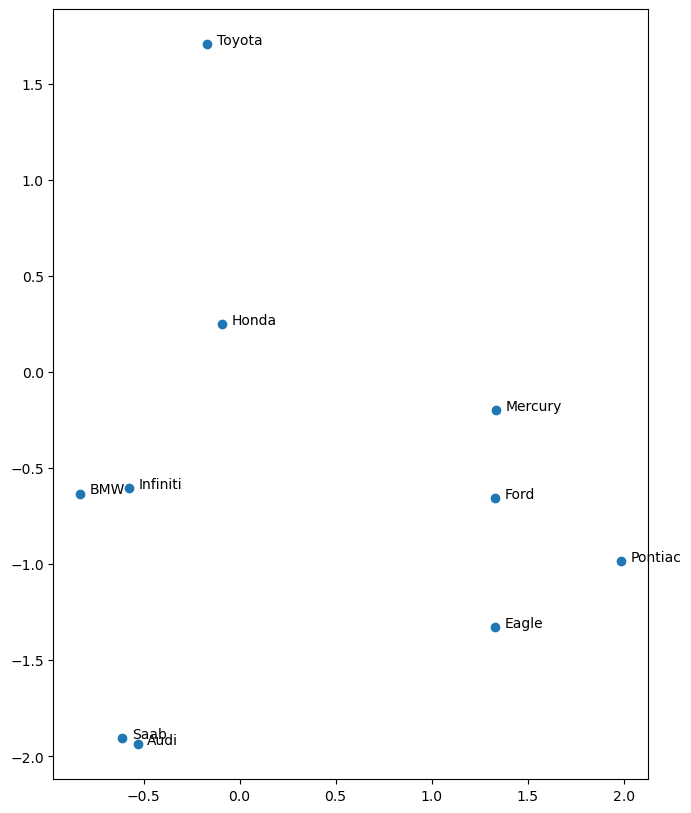

In [12]:
fa2 = FactorAnalyzer(n_factors=2, rotation=None)
fa_fit_out2 = fa2.fit(cars_ar)
fa_communalities2 = fa_fit_out2.get_communalities()
fa_gof2 = sum(fa_communalities2)
fa_scores2 = fa_fit_out2.transform(cars_ar)
fa_factor_loadings2 = fa_fit_out2.loadings_

x2 = fa_scores2[:,0]
y2 = fa_scores2[:,1]

plt.figure(figsize=(10,10))
plt.scatter(x2, y2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
for i in range(len(x2)):
    plt.annotate(names[i], (x2[i]+0.05, y2[i]))
plt.show()

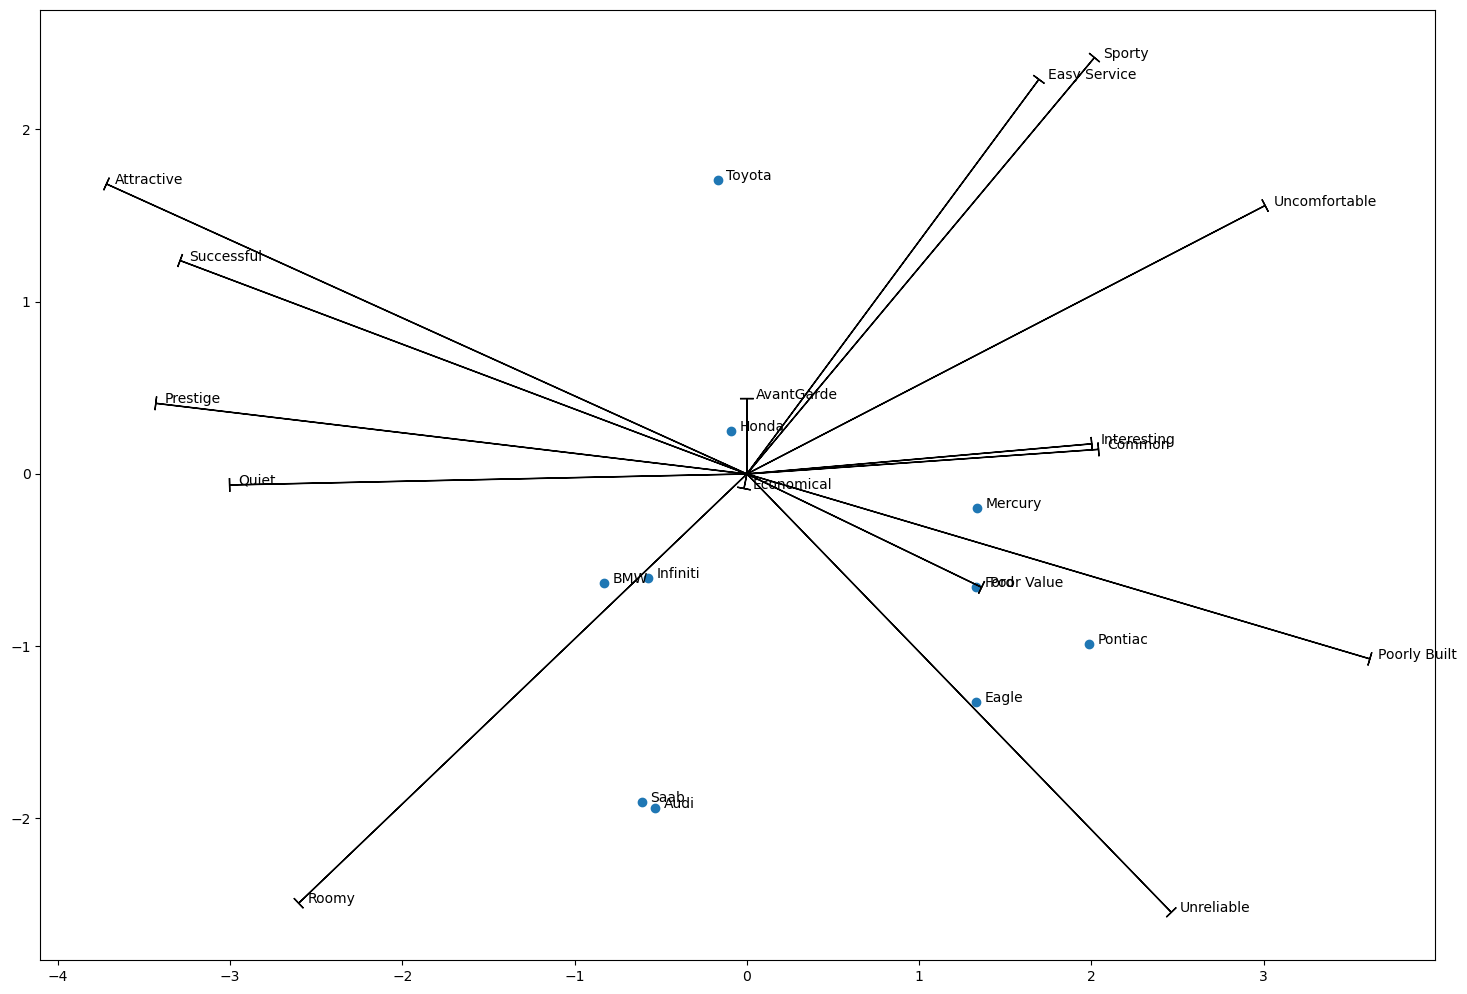

In [13]:
bx = fa_factor_loadings2[:,0]
by = fa_factor_loadings2[:,1]
R2 = fa_communalities2
attributes = np.array(cars_ar.columns)

arrow_origin_x = 0
arrow_origin_y = 0
arrowlengthscaleup = 4

plt.figure(figsize=(18,18))
plt.scatter(x2, y2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
for i in range(len(x2)):
    plt.annotate(names[i], (x2[i]+0.05, y2[i]))

for i in range(len(attributes)):
    arrow_end_x = (arrowlengthscaleup * R2[i] * bx[i]) / np.sqrt(bx[i]**2 + by[i]**2)
    arrow_end_y = (arrowlengthscaleup * R2[i] * by[i]) / np.sqrt(bx[i]**2 + by[i]**2)
    plt.arrow(arrow_origin_x, arrow_origin_y, arrow_end_x - arrow_origin_x, arrow_end_y - arrow_origin_y, length_includes_head=True, head_width=0.08, head_length=0.0002)
    plt.annotate(attributes[i], (arrow_end_x+0.05, arrow_end_y))
plt.show()